## Feature Scaling

### Standardization

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


<b> Train Test Split </b>

In [98]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.3, random_state=0)
# I have no idea about the parameters and why give them that way
x_train.shape, x_test.shape

((280, 2), (120, 2))

#### Standard Scaler

In [99]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

scaler.fit(x_train) # fit the train data
# this basically means storing the mean and STD of the unscaled data

# transform the scaled data
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [100]:
# the scaled data is in the form of numpy array
# transform it into a pandas array again
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

x_train_scaled # note that this is scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [101]:
# now compare the scaled and unscaled data
round(x_train_scaled.describe())

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,0.0
75%,1.0,1.0
max,2.0,2.0


In [102]:
round(x_train.describe())
# you will note that the columns have vlues which are comparable to each other

,Age,EstimatedSalary
count,280.0,280.0
mean,38.0,69807.0
std,10.0,34641.0
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


### Effects of Scaling

Text(0.5, 1.0, 'Before Scaling')

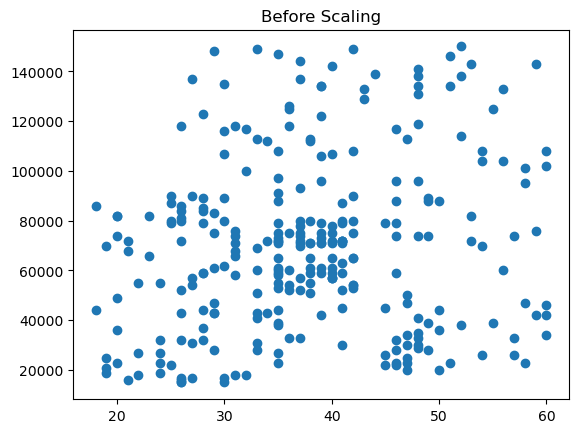

In [103]:
plt.scatter(x_train['Age'], x_train['EstimatedSalary'])
plt.title('Before Scaling')

Text(0.5, 1.0, 'After Scaling')

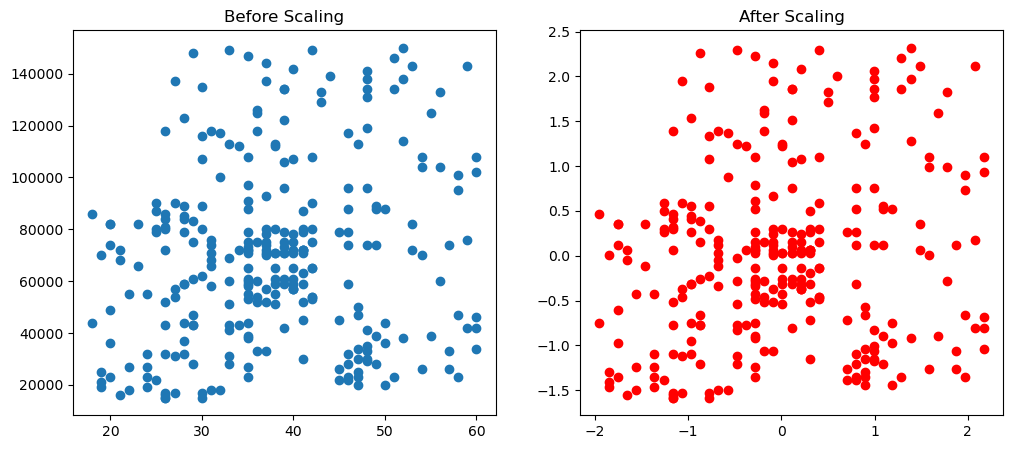

In [104]:
# for a better comparision we will disply the plots side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5)) # figsize is for the whole figure

ax1.scatter(x=x_train['Age'], y=x_train['EstimatedSalary'])
ax1.set_title('Before Scaling')

ax2.scatter(x=x_train_scaled['Age'], y=x_train_scaled['EstimatedSalary'], color='red')
ax2.set_title('After Scaling')

Note that the shape of the data remains unchaged. But now the data is centered around the mean = 0. And also now the Probability Density Functions are evenly matched. See below for a graphical view.

<Axes: title={'center': 'Before Scaling'}, xlabel='Age', ylabel='Density'>

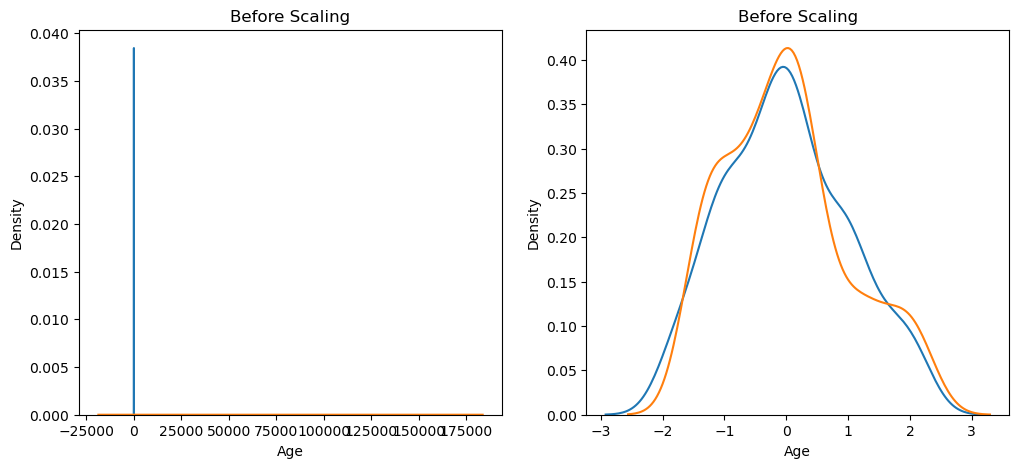

In [105]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Before Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)

After scaling now you are free to compute a lot on this data, and since these columns are in the same scale there won't be data left out or the computation won't affect the data in a bad way.

### Comparrions of Distribution

Note that the shape remained same....which is crucial to make accurate predications from the data.

<Axes: title={'center': 'Before Scaling'}, xlabel='Age', ylabel='Density'>

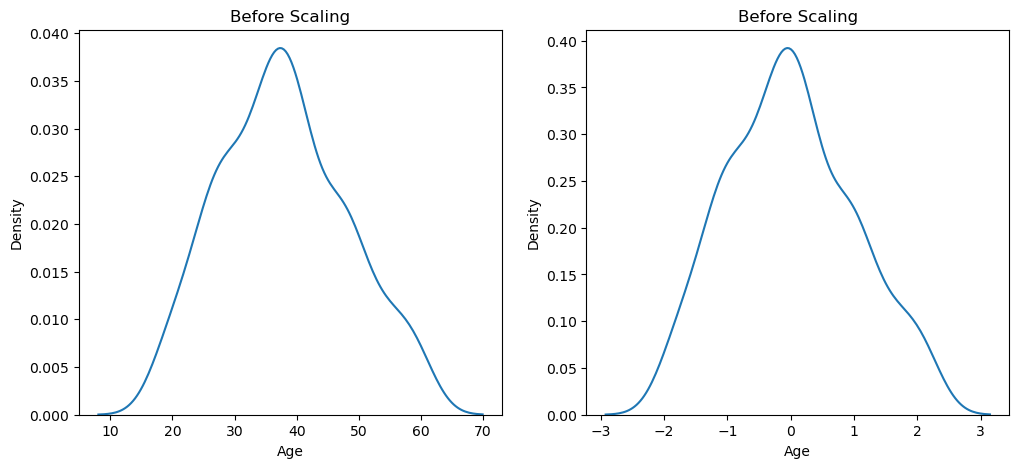

In [106]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Before Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)

### Why is Scaling Important

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
# create Logistic Regression objects to perform operations
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [109]:
lr.fit(x_train, y_train)
lr_scaled.fit(x_train_scaled, y_train)
# note that we did not scale the y_train (because if we scale the results this is all pointless!!)

LogisticRegression()

In [110]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [112]:
# now compare the accuracy of both the data
from sklearn.metrics import accuracy_score

print('Actual Data', accuracy_score(y_test, y_pred))
print('Scaled Data', accuracy_score(y_test, y_pred_scaled))

Actual Data 0.6583333333333333
Scaled Data 0.8666666666666667


<b> Look, the Effeciency went up!! </b>

But remeber, this works only on certain algorithms which are skewed by this kind of data, Look at accuracy when trained by "Decision Trees" algorithm.

In [113]:
from sklearn.tree import DecisionTreeClassifier

# make objects
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [114]:
dt.fit(x_train, y_train)
dt_scaled.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [121]:
y_pred = dt.predict(x_test)
y_pred_scaled = dt_scaled.predict(x_test_scaled)

In [122]:
# comparing the effeciency
print('Actual', accuracy_score(y_test, y_pred))
print('Scaled', accuracy_score(y_test, y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


### Effect of Outliers

In [124]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


We shall try adding our own outliers and see how the algorithm behaves

In [129]:
df = df.append(pd.DataFrame({'Age':[5, 90, 95], 'EstimatedSalary': [1000, 250000, 350000], 'Purchased': [0,1,1]}), ignore_index=True)
df.tail

C:\Users\vivek\AppData\Local\Temp\ipykernel_2068\4065452116.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Age':[5, 90, 95], 'EstimatedSalary': [1000, 250000, 350000], 'Purchased': [0,1,1]}), ignore_index=True)


<bound method NDFrame.tail of      Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
407   90           250000          1
408   95           350000          1
409    5             1000          0
410   90           250000          1
411   95           350000          1

[412 rows x 3 columns]>

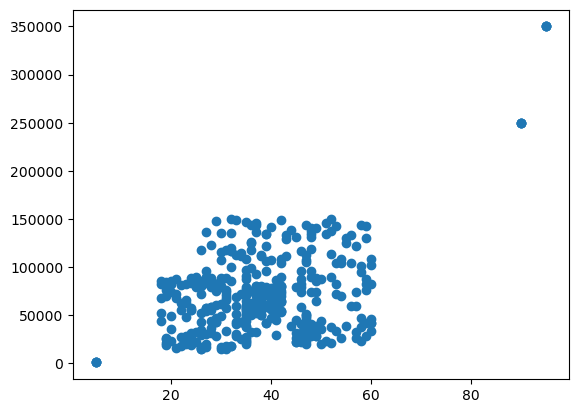

In [131]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [133]:
# now apply standardisation on this data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1), df['Purchased'], test_size=0.3, random_state=0)
x_train.shape, x_test.shape

((288, 2), (124, 2))

Text(0.5, 1.0, 'After Scaling')

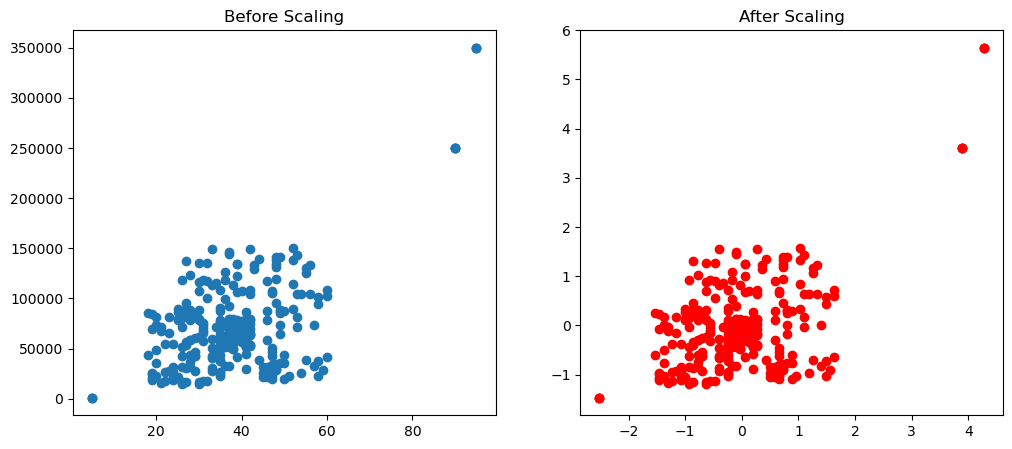

In [136]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Age'], x_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'], color='red')
ax2.set_title('After Scaling')

Note that scaling the Data did absolutely nothing to the outliers, this means even scaled you'll have to take care of the outliers explicitly.

When to apply Standardization??

- K-Means
- K-Nearest Neighbours
- Principle Compoenet Analysis
- Artificial Neural Networks
- Gradient Descent

If you have these, use standardisation without a second thought!!